# Accumulated Local Effects (ALE) Plot

Accumulated local effects describe how features influence the prediction of a machine learning model on average. ALE plots are a faster and unbiased alternative to partial dependence plots.  
If features of a machine learning model are correlated, PDPs cannot be trusted.
Thus, ALE plots are used to get a feature effect estimate that respects the correlation by calculating – based on the conditional distribution of the features – differences in predictions, compared to averages as it is done for marginal plots to block the effect of other features.

ALE plots average the changes in the predictions and accumulate them over the grid.  
$$f_S(x_S) := \int \int f^S(z_s,x_{-s})dP(x_{-S} | z_S) - constant$$  
with  
$$ f^S(x_s, x_{-s}) = \frac{\partial f(x_S, x_{-S})}{\partial x_S} . $$



**Literature**

Apley, Daniel W., and Jingyu Zhu. “Visualizing the effects of predictor variables in black box supervised learning models.” Journal of the Royal Statistical Society: Series B (Statistical Methodology)

In [1]:
import numpy as np
import sys
import seaborn as sn
import config
import matplotlib.pyplot as plt
import sloth


import logging
logger = logging.getLogger('sloth')
logger.setLevel(level=logging.DEBUG)

sn.set_style("whitegrid")
#sn.set_theme()

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users/doeltz/development/RiVaPy\rivapy\__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')
C:\Users\doeltz\software\anaconda3\envs\sloth\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\doeltz\software\anaconda3\envs\sloth\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The imp

In [2]:
# get a sample validation task from a synthetic credit default model
validation_task = sloth.datasets.credit_default.get(0,0)

In [3]:
#generate an object of the PDP class
ale = sloth.explainers.global_explainers.ALE(validation_task, n_steps=50, min_value=None, max_value=None)
ale_explanation = ale.explain()

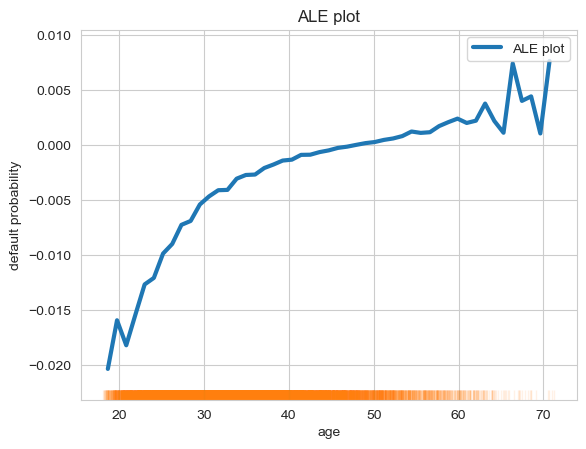

In [4]:
# We can now plot the partial dependents of the features. Here, one can specify a list of features to 
# restrict the plotting to these features only, or all ordinal features will be plotted.
ale_explanation.plot(features='age') # PDP for feature age only